In [93]:
import torch
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import d2l.torch as d2l
import time

In [16]:
mnist_train = datasets.FashionMNIST(root="../data", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.FashionMNIST(root='../data', train=False, transform=transforms.ToTensor(), download=True)

In [24]:
len(mnist_train), len(mnist_test)

(60000, 10000)

In [37]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

In [52]:
text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat','sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
id2class = dict(zip(range(len(text_labels)), text_labels))
class2id = {v: k for k, v in class2id.items()}
id2class, class2id

({0: 't-shirt',
  1: 'trouser',
  2: 'pullover',
  3: 'dress',
  4: 'coat',
  5: 'sandal',
  6: 'shirt',
  7: 'sneaker',
  8: 'bag',
  9: 'ankle boot'},
 {0: 't-shirt',
  1: 'trouser',
  2: 'pullover',
  3: 'dress',
  4: 'coat',
  5: 'sandal',
  6: 'shirt',
  7: 'sneaker',
  8: 'bag',
  9: 'ankle boot'})

In [63]:
# 只针对于灰度图片
def show_imgs(imgs, rows, cols, labels=None):  
    fig = plt.figure(figsize=(8, 4))
    for idx in range(rows * cols):
        ax = fig.add_subplot(rows, cols, idx+1, xticks=[], yticks=[])
        ax.set_title(id2class[int(labels[idx])])
        if torch.is_tensor(imgs):
            plt.imshow(imgs[idx].numpy())
        else:
            plt.imshow(imgs[idx])

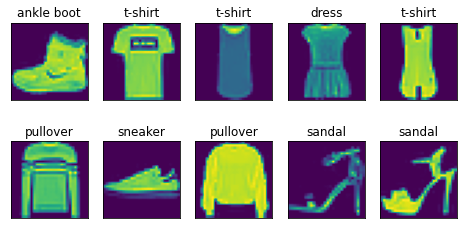

In [64]:
X, y = next(iter(DataLoader(mnist_train, batch_size=10)))
show_imgs(X.reshape(10, 28, 28), 2, 5, y)

In [88]:
batch_size = 256

train_iter = DataLoader(mnist_train, batch_size, shuffle=True, num_workers=4)

In [91]:
start = time.time()
for X, y in train_iter:
    continue
f'{time.time()-start:4f} second'

'4.242627 second'

In [94]:
def load_data_fashion_minst(batch_size, resize=None):
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)

    mnist_train = torchvision.datasets.FashionMNIST(root='../data', train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(root='../data', train=False, transform=trans, download=False)

    return (DataLoader(mnist_train, batch_size, shuffle=True, num_workers=4),
            DataLoader(mnist_test, batch_size,shuffle=False, num_workers=4))

In [95]:
train_iter, test_iter = load_data_fashion_minst(256)
for X, y in test_iter:
    print(X.size(), y.size())
    break

torch.Size([256, 1, 28, 28]) torch.Size([256])
